#### Importation des Modules

In [1]:
# Module de base
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Classifieurs automatique
from sklearn.ensemble import StackingClassifier
#from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#SVM, RNA, KNN combine SVM
# Preprocessing
from sklearn.preprocessing import StandardScaler
# Mesure de performance
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import train_test_split
# Courbe d'apprentissage
from sklearn.model_selection import LearningCurveDisplay, learning_curve

#### Importation du DataSet

In [2]:
# Dataset
df=pd.read_csv("data_hepatite.csv")

In [3]:
df

,id,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,0,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,0,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,0,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,0,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
nombre_total = df['Category'].__len__()
malade = df[df['Category'] == 0].__len__()
nom_malade = df[df['Category'] != 0].__len__()
print('Le nombre total des individus : ',nombre_total)
print('Le nombre des individus malade : ',malade)
print('Le nombre des individus nom_malade : ',nom_malade)

Le nombre total des individus :  615
Le nombre des individus malade :  591
Le nombre des individus nom_malade :  24


#### Visualisation des Données

([<matplotlib.axis.XTick at 0x1524ad81c60>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

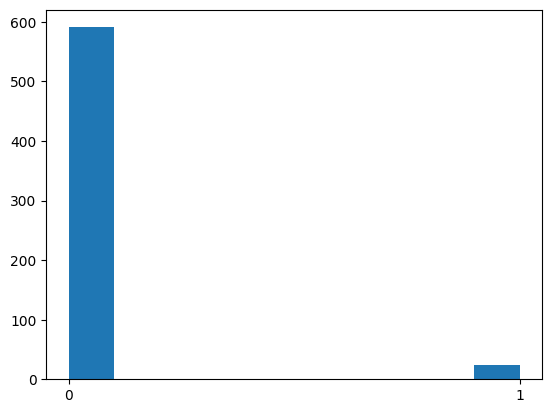

In [5]:
plt.hist(df['Category'])
plt.xticks([0,1])

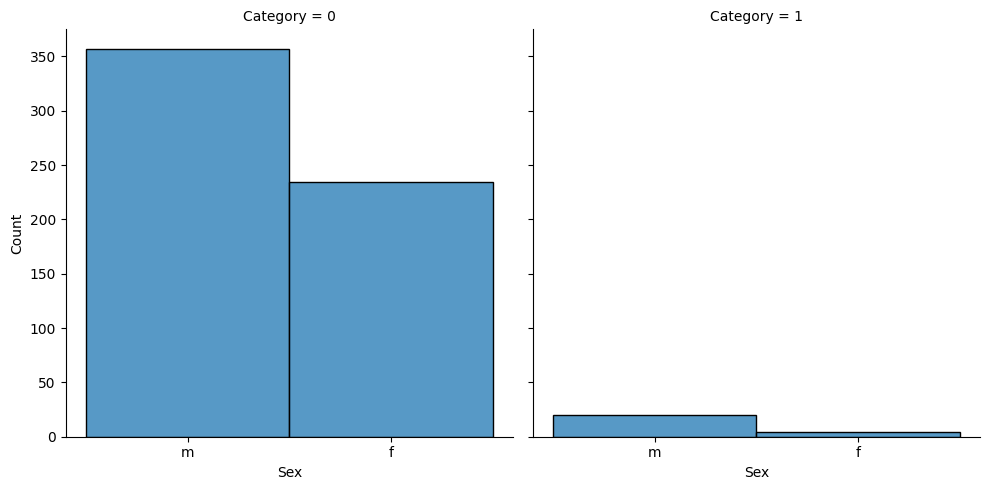

In [6]:
import seaborn as sns
sns.displot(df, x='Sex', col="Category")

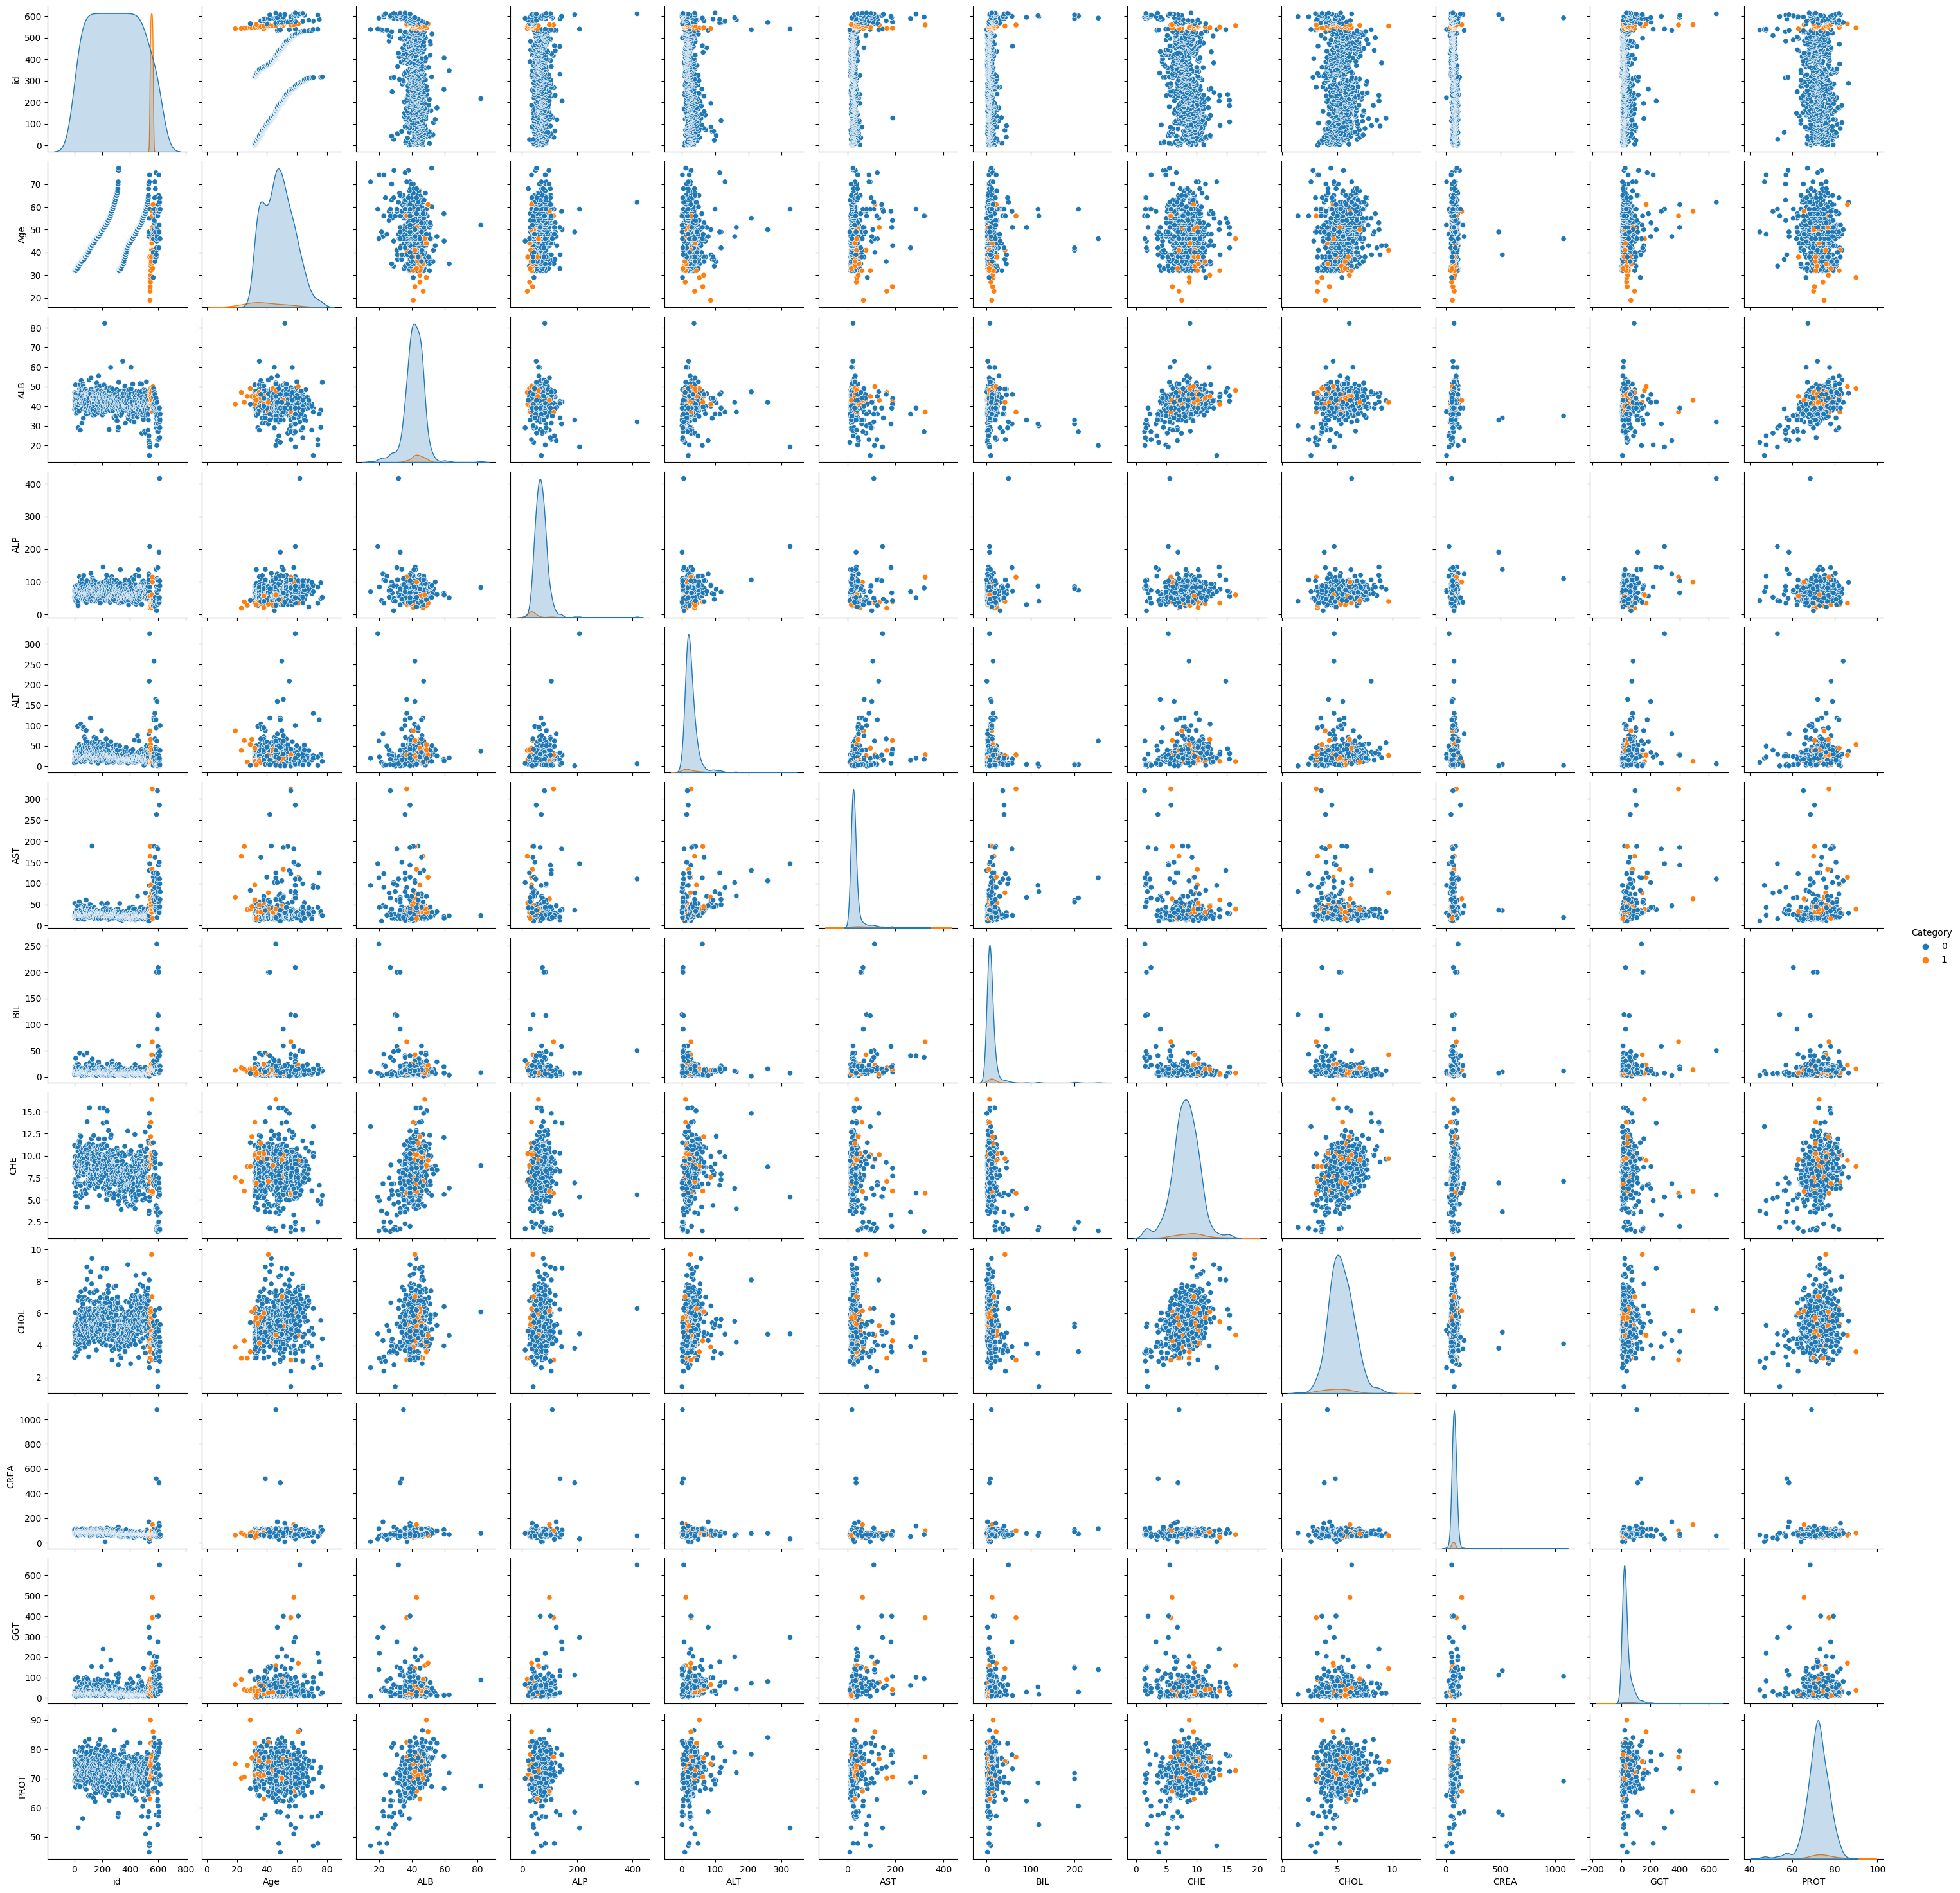

In [7]:
sns.pairplot(df, hue="Category")

In [8]:
colonne = df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        615 non-null    int64  
 1   Category  615 non-null    int64  
 2   Age       615 non-null    int64  
 3   Sex       615 non-null    object 
 4   ALB       614 non-null    float64
 5   ALP       597 non-null    float64
 6   ALT       614 non-null    float64
 7   AST       615 non-null    float64
 8   BIL       615 non-null    float64
 9   CHE       615 non-null    float64
 10  CHOL      605 non-null    float64
 11  CREA      615 non-null    float64
 12  GGT       615 non-null    float64
 13  PROT      614 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 67.4+ KB


#### Numérisation

In [9]:
numerique = []
for k,v in zip(df.columns,df.dtypes):
    if v=="object":
        numerique.append(k)
#
numerisation = {colonne:{v:k for k,v in enumerate(df[colonne].unique())}
for colonne in numerique}
#
for colonne in numerique:
    df[colonne]= df[colonne].map(numerisation[colonne])

#### Détermination des valeurs manquantes

In [10]:
df.isna().sum()

id           0
Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [11]:
df.fillna(df['ALB'].mean(),inplace=True)
df.fillna(df['ALP'].mean(),inplace=True)
df.fillna(df['ALT'].mean(),inplace=True)
df.fillna(df['CHOL'].mean(),inplace=True)
df.fillna(df['PROT'].mean(),inplace=True)
df.isna().sum()

id          0
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

#### Normalisation de Données

In [12]:
y = df['Category']
X = df.drop(['Category'], axis = 1)

In [13]:
scaler = StandardScaler()
scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=111)

#### Construction du Modèle

In [14]:
neigh = KNeighborsClassifier(n_neighbors=3)
estimators = [('RNA',MLPClassifier(hidden_layer_sizes=(100,),activation='relu',max_iter=100)), ('AD',DecisionTreeClassifier()), ('KNN',neigh)]
stacking = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(hidden_layer_sizes=(100,),activation='relu',max_iter=100))

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


 Accuracy : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00         3

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



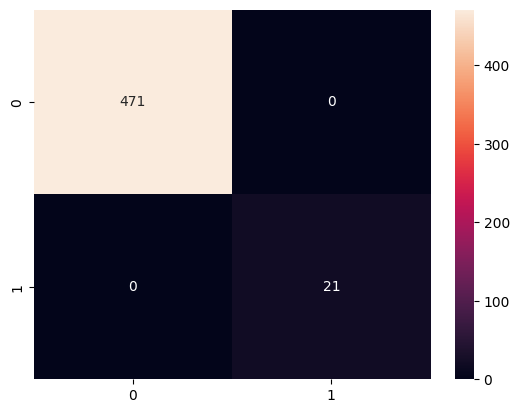

In [15]:
stacking.fit(X_train, y_train)
acc = stacking.score(X_train, y_train)
print(' Accuracy : %.2f' % (acc))
# 
result = confusion_matrix(y_train, stacking.predict(X_train))
sns.heatmap(result, annot=True, fmt='d')
# 
from sklearn.metrics import classification_report
mesure = classification_report(y_test, stacking.predict(X_test))
print(mesure)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

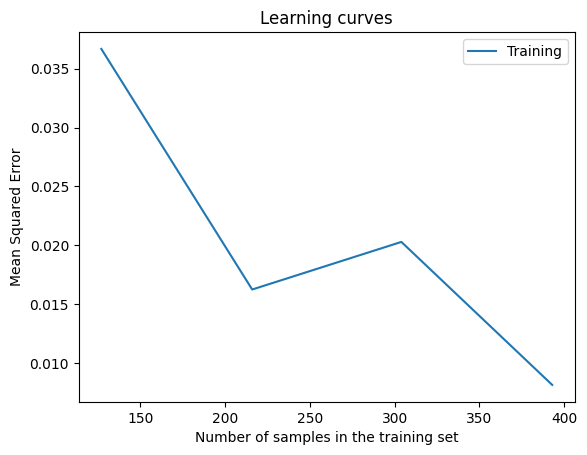

In [16]:
_, ax = plt.subplots()
common_params = {
    "scoring": "neg_mean_squared_error",
    "negate_score": True,
    "score_name": "Mean Squared Error",
    "score_type": "test",
    "std_display_style": None,
    "ax": ax,
}
LearningCurveDisplay.from_estimator(stacking, X_train, y_train, **common_params)
ax.set_title("Learning curves")
ax.legend(handles=ax.get_legend_handles_labels()[0], labels=["Training"])
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:

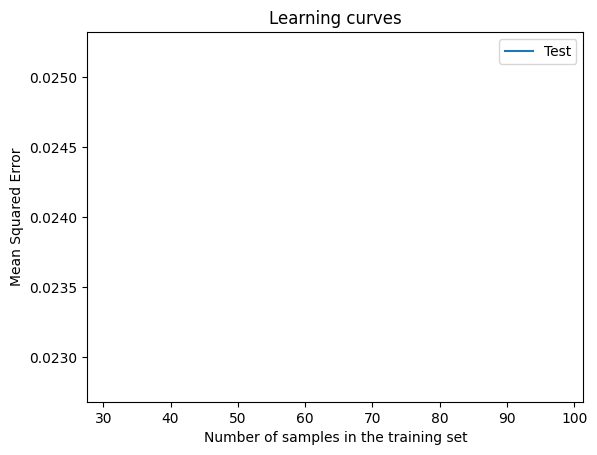

In [17]:
_, ax = plt.subplots()
common_params = {
    "scoring": "neg_mean_squared_error",
    "negate_score": True,
    "score_name": "Mean Squared Error",
    "score_type": "test",
    "std_display_style": None,
    "ax": ax,
}
LearningCurveDisplay.from_estimator(stacking, X_test, y_test, **common_params)
ax.set_title("Learning curves")
ax.legend(handles=ax.get_legend_handles_labels()[0], labels=["Test"])
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization has

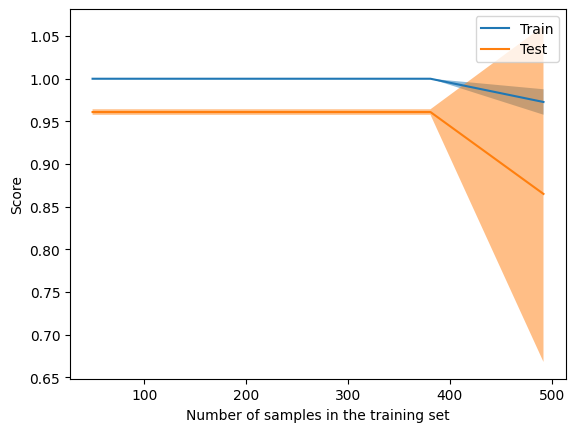

In [18]:
train_sizes, train_scores, test_scores = learning_curve(stacking, X, y)
display = LearningCurveDisplay(train_sizes=train_sizes, train_scores=train_scores, test_scores=test_scores, score_name="Score")
display.plot()
plt.show()